<a href="https://colab.research.google.com/github/CastanharoA/_projetos/blob/master/economia1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandoc
import pandoc

In [ ]:
# Importando as Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [ ]:
  # Importando o YFinance e sobrescrevendo os métodos do pandas_datareader
import yfinance as yf
yf.pdr_override()

In [ ]:
# Baixando as cotações do Yahoo Finance para o Índice Bovespa
ibov = web.get_data_yahoo('^BVSP')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Exibindo as cotações mais antigas
ibov.head()

Open       High        Low      Close  Adj Close  Volume
Date                                                                     
1993-04-27  24.799999  25.400000  24.500000  24.500000  24.500000       0
1993-04-28  24.500000  24.600000  23.700001  24.299999  24.299999       0
1993-04-29  24.299999  24.799999  23.700001  23.700001  23.700001       0
1993-04-30  23.700001  24.200001  23.700001  24.100000  24.100000       0
1993-05-03  24.100000  24.400000  23.799999  24.100000  24.100000       0

In [ ]:
# Exibindo as cotações mais recentes
ibov.tail()

Open          High            Low         Close  \
Date                                                                   
2023-08-17  115592.000000  116610.00000  114859.000000  114982.00000   
2023-08-18  114973.000000  115729.00000  114423.000000  115409.00000   
2023-08-21  115404.000000  115425.00000  114067.000000  114429.00000   
2023-08-22  114433.000000  116286.00000  114433.000000  116156.00000   
2023-08-23  116159.671875  118134.59375  116158.890625  118134.59375   

               Adj Close    Volume  
Date                                
2023-08-17  114982.00000  12747500  
2023-08-18  115409.00000  10601000  
2023-08-21  114429.00000   9794400  
2023-08-22  116156.00000   9828500  
2023-08-23  118134.59375         0

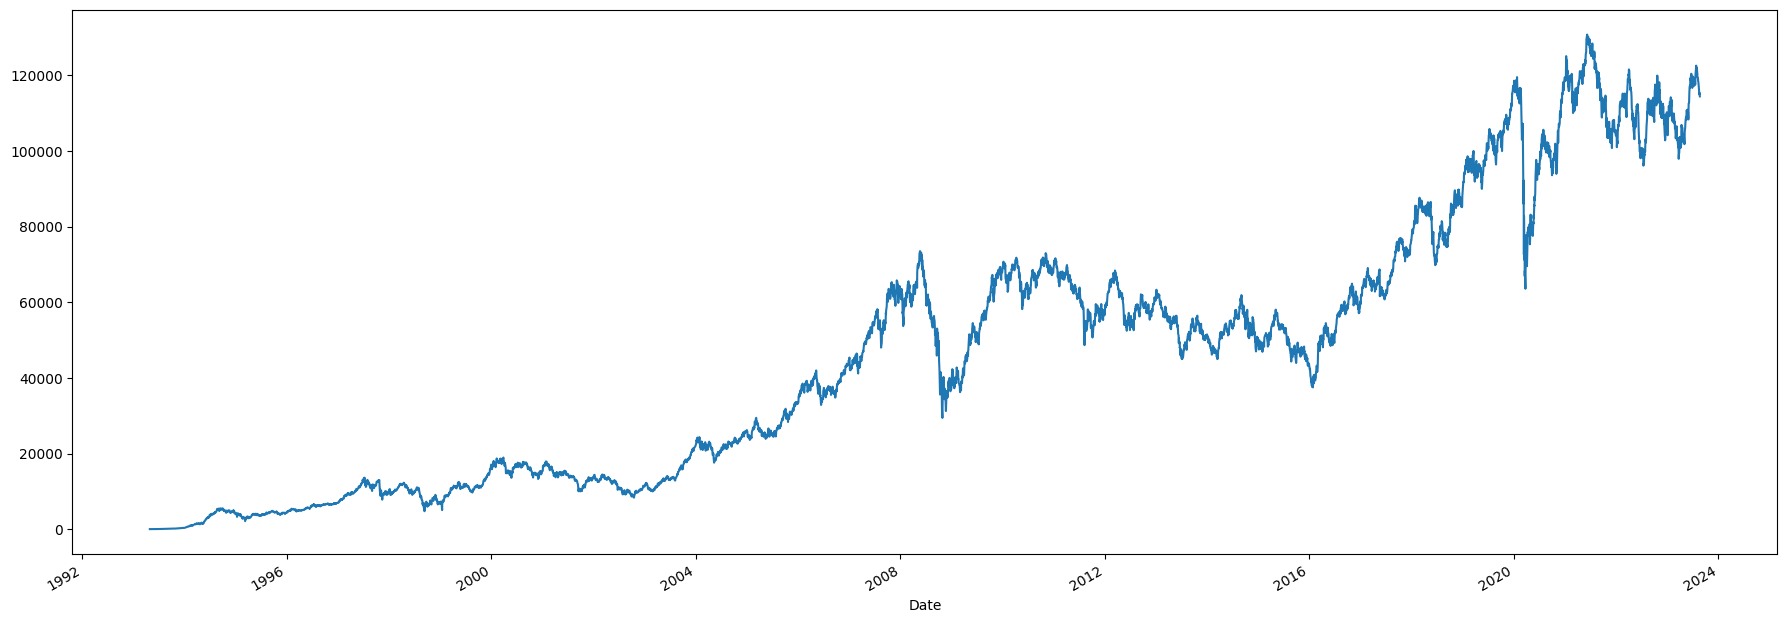

In [ ]:
# Plotando o gráfico com o preços de fechamento do Índice Bovespa
ibov["Close"].plot(figsize=(22,8));


In [ ]:
# Baixando as cotações do Yahoo Finance para o Índice Bovespa
ibov = web.get_data_yahoo('itub4.SA', start='2020-07-01', end='2023-07-01')

[*********************100%%**********************]  1 of 1 completed


In [ ]:

ibov.head()

Open       High        Low      Close  Adj Close  Volume
Date                                                                     
1993-04-27  24.799999  25.400000  24.500000  24.500000  24.500000       0
1993-04-28  24.500000  24.600000  23.700001  24.299999  24.299999       0
1993-04-29  24.299999  24.799999  23.700001  23.700001  23.700001       0
1993-04-30  23.700001  24.200001  23.700001  24.100000  24.100000       0
1993-05-03  24.100000  24.400000  23.799999  24.100000  24.100000       0

In [ ]:
ibov.tail()

Open          High            Low         Close  \
Date                                                                   
2023-08-17  115592.000000  116610.00000  114859.000000  114982.00000   
2023-08-18  114973.000000  115729.00000  114423.000000  115409.00000   
2023-08-21  115404.000000  115425.00000  114067.000000  114429.00000   
2023-08-22  114433.000000  116286.00000  114433.000000  116156.00000   
2023-08-23  116159.671875  118134.59375  116158.890625  118134.59375   

               Adj Close    Volume  
Date                                
2023-08-17  114982.00000  12747500  
2023-08-18  115409.00000  10601000  
2023-08-21  114429.00000   9794400  
2023-08-22  116156.00000   9828500  
2023-08-23  118134.59375         0

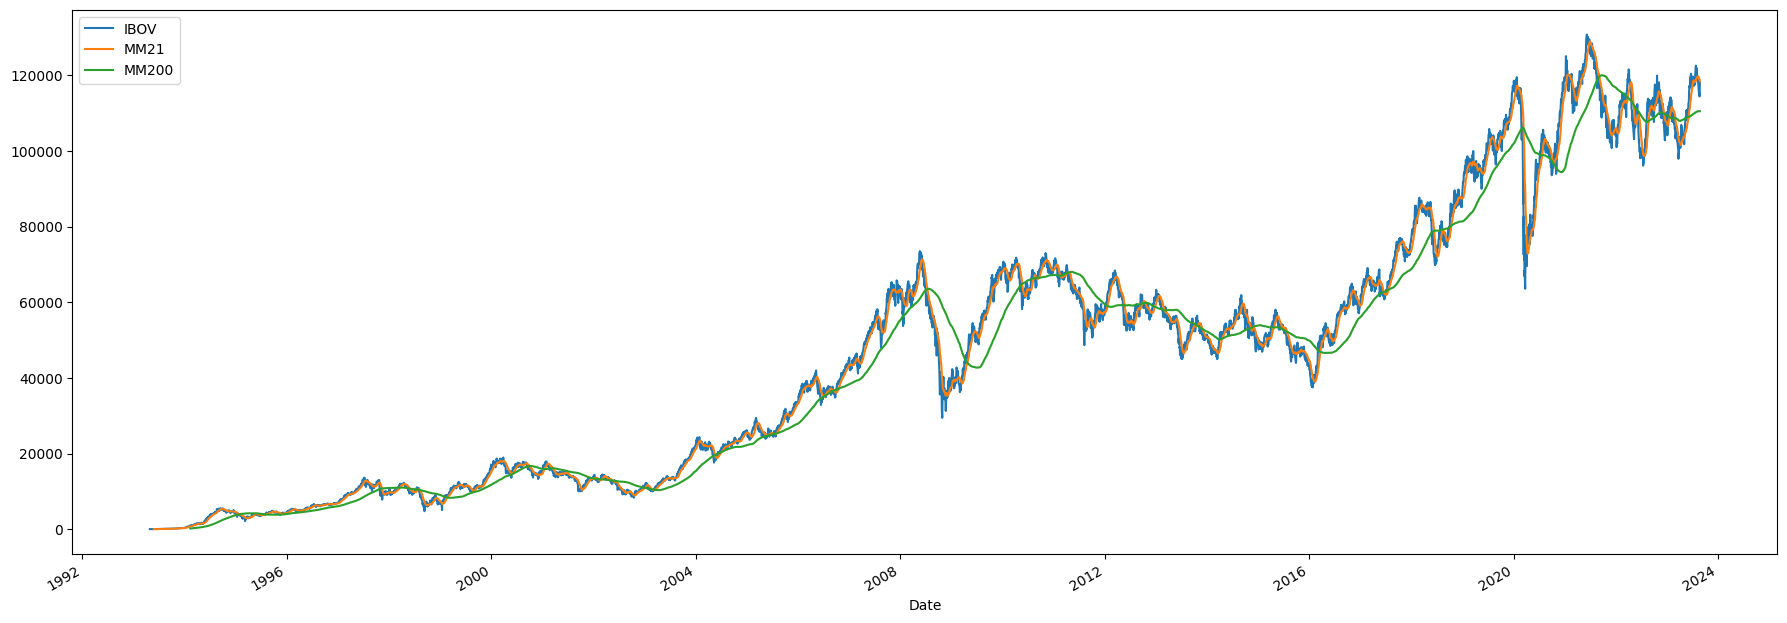

In [ ]:
ibov["Close"].plot(figsize=(22,8), label="IBOV")
#  aplica uma função de janela deslizante. calculada uma média móvel 21 dias. Isso significa que para cada ponto no conjunto de dados, é considerada uma janela de 21 dias (incluindo o ponto atual e os 20 dias anteriores)
ibov["Close"].rolling(21).mean().plot(label="MM21")
ibov["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

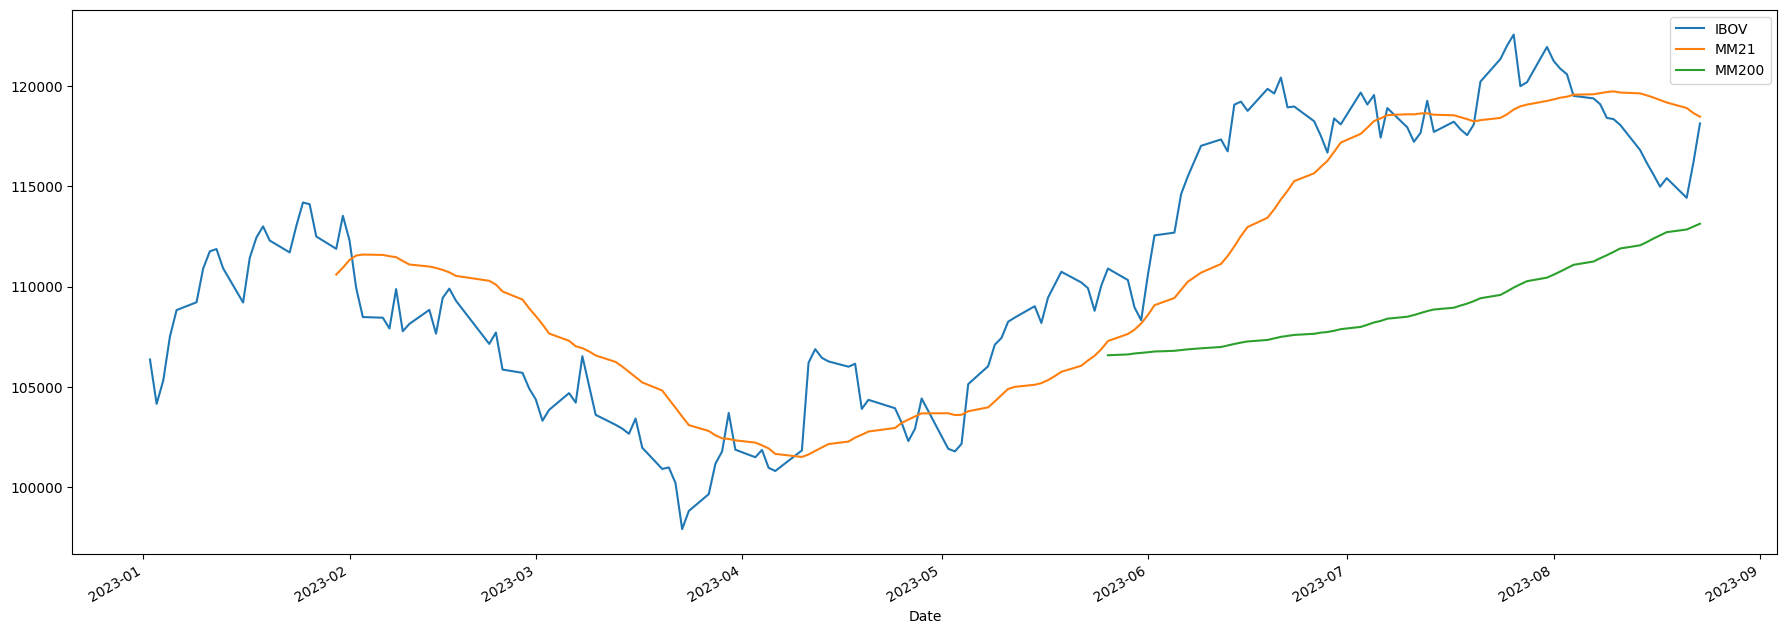

In [ ]:

ibov_fatiado = ibov[(ibov.index.year >= 2023) & (ibov.index.year <= 2023)]
ibov_fatiado["Close"].plot(figsize=(22,8), label="IBOV")
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21")
ibov_fatiado["Close"].rolling(100).mean().plot(label="MM200")
plt.legend()


In [ ]:
import pandas as pd

# Supondo que você já tenha um DataFrame chamado "ibov" com os dados do índice Bovespa, incluindo a coluna "Close"

# Calcular as variações percentuais diárias
ibov["Daily Change"] = ibov["Close"].pct_change()

# Encontrar o período de maior queda
max_drawdown = ibov["Daily Change"].min()
start_date = ibov[ibov["Daily Change"] == max_drawdown].index[0]
end_date = ibov[ibov["Daily Change"] == max_drawdown].index[-1]

print("Maior queda percentual:", max_drawdown)
print("Período de queda:", start_date, "a", end_date)

Maior queda percentual: -0.15809018567639255
Período de queda: 1998-09-10 00:00:00 a 1998-09-10 00:00:00


In [ ]:
import pandas as pd

# Supondo que você já tenha um DataFrame chamado "ibov" com os dados do índice Bovespa, incluindo a coluna "Close"

# Definir a frequência do índice como semanal (segunda-feira a domingo)
ibov.index = pd.to_datetime(ibov.index)
ibov_weekly = ibov.resample('W-MON').last()

# Calcular as variações percentuais semanais
ibov_weekly["Weekly Change"] = ibov_weekly["Close"].pct_change()

# Encontrar o período de maior queda semanal
max_weekly_drawdown = ibov_weekly["Weekly Change"].min()
start_week = ibov_weekly[ibov_weekly["Weekly Change"] == max_weekly_drawdown].index[0]
end_week = ibov_weekly[ibov_weekly["Weekly Change"] == max_weekly_drawdown].index[-1]

print("Maior queda percentual semanal:", max_weekly_drawdown)
print("Semana de maior queda:", start_week, "a", end_week)

Maior queda percentual semanal: -0.2536953931188357
Semana de maior queda: 2008-10-27 00:00:00 a 2008-10-27 00:00:00


In [ ]:
import pandas as pd

# Supondo que você já tenha um DataFrame chamado "ibov" com os dados do índice Bovespa, incluindo a coluna "Close"


# Calcular as variações absolutas semanais
ibov_weekly["Daily Change"] = ibov_weekly["Close"].diff()

# Encontrar o período de maior queda semanal
max_weekly_drawdown = ibov_weekly["Daily Change"].min()
start_week = ibov_weekly[ibov_weekly["Daily Change"] == max_weekly_drawdown].index[0]
end_week = ibov_weekly[ibov_weekly["Daily Change"] == max_weekly_drawdown].index[-1]

print("Maior queda percentual diaria:", max_weekly_drawdown)
print("Período de queda::", start_week, "a", end_week)

Maior queda percentual diaria: -20558.0
Período de queda:: 2020-03-09 00:00:00 a 2020-03-09 00:00:00


In [ ]:
import pandas as pd

# Supondo que você já tenha um DataFrame chamado "ibov" com os dados do índice Bovespa, incluindo a coluna "Close"

# Definir a frequência do índice como semanal (segunda-feira a domingo)
ibov.index = pd.to_datetime(ibov.index)
ibov_weekly = ibov.resample('W-MON').last()

# Calcular as variações absolutas semanais
ibov_weekly["Weekly Change"] = ibov_weekly["Close"].diff()

# Encontrar a maior queda semanal em valor absoluto
max_weekly_drop = ibov_weekly["Weekly Change"].min()
start_week = ibov_weekly[ibov_weekly["Weekly Change"] == max_weekly_drop].index[0]
end_week = ibov_weekly[ibov_weekly["Weekly Change"] == max_weekly_drop].index[-1]

print("Maior queda semanal em valor absoluto:", max_weekly_drop)
print("Semana de maior queda:", start_week, "a", end_week)

Maior queda semanal em valor absoluto: -20558.0
Semana de maior queda: 2020-03-09 00:00:00 a 2020-03-09 00:00:00


In [ ]:
# Baixando as cotações do Yahoo Finance para o Índice Bovespa
ibov = web.get_data_yahoo('itub4.SA', start='2021-09-30', end='2021-10-20')

[*********************100%%**********************]  1 of 1 completed


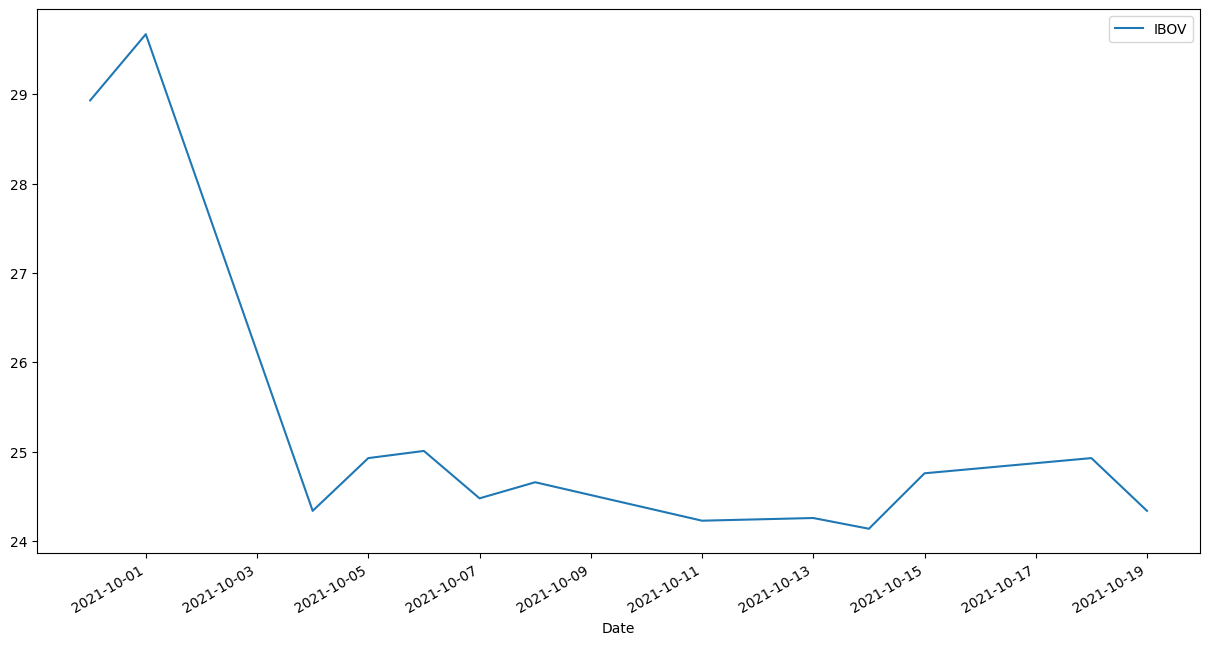

In [ ]:
ibov["Close"].plot(figsize=(15,8), label="IBOV")
#  aplica uma função de janela deslizante. calculada uma média móvel 21 dias. Isso significa que para cada ponto no conjunto de dados, é considerada uma janela de 21 dias (incluindo o ponto atual e os 20 dias anteriores)
#ibov["Close"].rolling(21).mean().plot(label="MM21")
#ibov["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

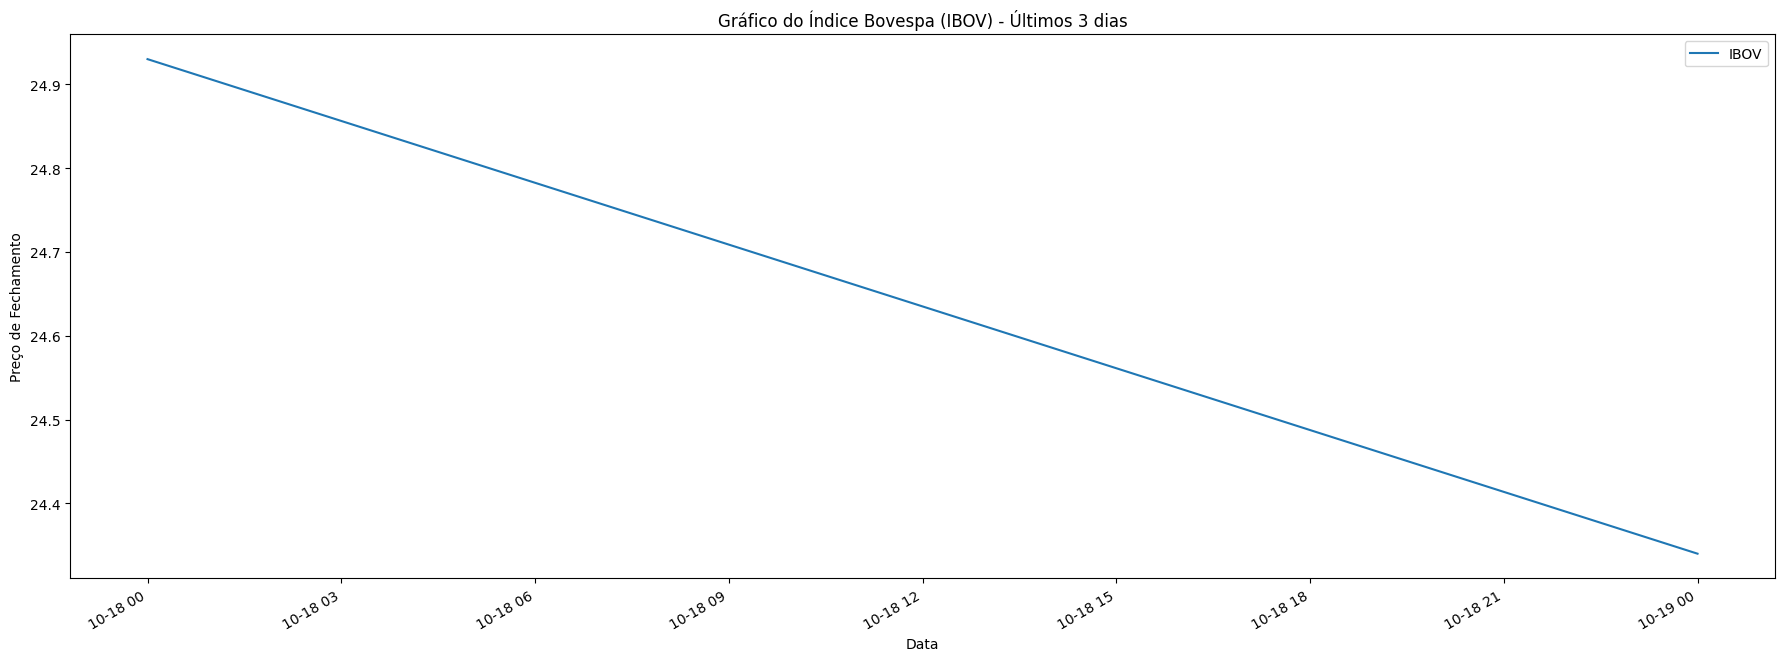

In [ ]:
import matplotlib.pyplot as plt

# Supondo que você já tenha um DataFrame chamado "ibov" com os dados do índice Bovespa, incluindo a coluna "Close"

# Filtrar os dados para o intervalo de 3 dias
ibov_3_days = ibov["Close"].last("3D")

# Plotar o gráfico
plt.figure(figsize=(22, 8))
ibov_3_days.plot(label="IBOV")
plt.title("Gráfico do Índice Bovespa (IBOV) - Últimos 3 dias")
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento")
plt.legend()
plt.show()

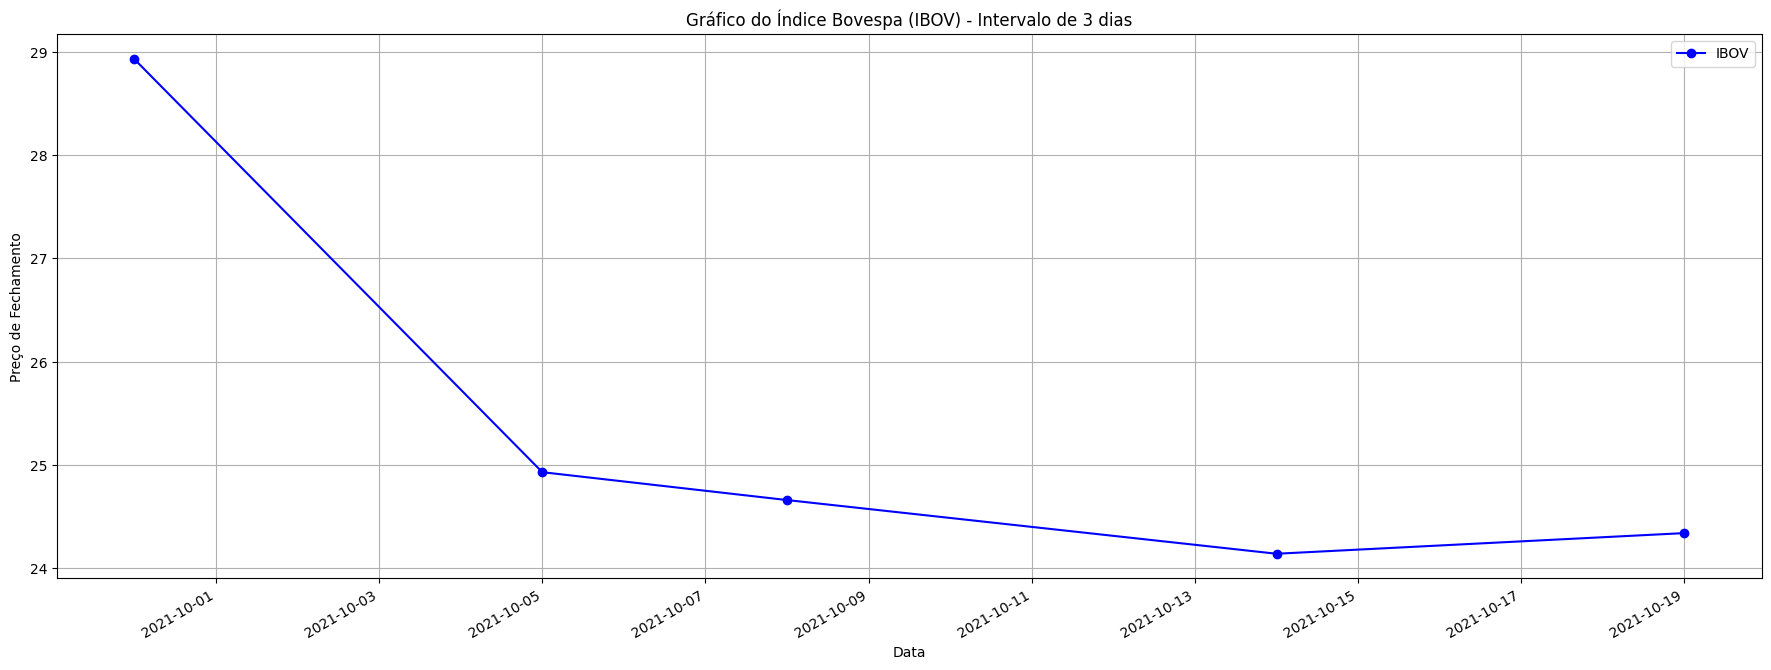

In [ ]:
import matplotlib.pyplot as plt

# Supondo que você já tenha um DataFrame chamado "ibov" com os dados do índice Bovespa, incluindo a coluna "Close"

# Selecionar os dados a cada 3 dias
ibov_3_day_interval = ibov["Close"].iloc[::3]

# Plotar o gráfico
plt.figure(figsize=(22, 8))
ibov_3_day_interval.plot(marker='o', linestyle='-', color='b', label="IBOV")
plt.title("Gráfico do Índice Bovespa (IBOV) - Intervalo de 3 dias")
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import seaborn as sns

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [ ]:

tickers = "ABEV3.SA ITSA4.SA WEGE3.SA USIM5.SA VALE3.SA itub4.sa itub3.sa amer3.sa CVCB3.sa"

carteira = yf.download(tickers, period="5y")["Adj Close"]

ibov = yf.download("^BVSP", period="5y")["Adj Close"]

[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
carteira.dropna(inplace=True)
carteira

ABEV3.SA   AMER3.SA   CVCB3.SA  ITSA4.SA   ITUB3.SA   ITUB4.SA  \
Date                                                                          
2018-08-23  16.030760  25.822559  39.796612  6.312350  20.019138  23.026028   
2018-08-24  16.140791  25.376841  41.529472  6.339067  20.068079  23.198820   
2018-08-27  16.191572  26.103556  42.878338  6.519421  20.660707  23.968029   
2018-08-28  16.166180  25.289635  41.568855  6.412545  20.628082  23.800812   
2018-08-29  16.293140  25.134604  42.779884  6.592898  20.579161  24.196573   
...               ...        ...        ...       ...        ...        ...   
2023-08-17  14.220000   1.020000   2.540000  9.316965  23.280001  26.750000   
2023-08-18  14.360000   1.030000   2.570000  9.370000  23.420000  26.959999   
2023-08-21  14.310000   1.010000   2.500000  9.230000  23.129999  26.850000   
2023-08-22  14.420000   1.020000   2.540000  9.380000  23.530001  27.270000   
2023-08-23  14.450000   1.000000   2.530000  9.560000  23.719999  27.610001   

            USIM5.SA   VALE3.SA   WEGE3.SA  
Date                                        
2018-08-23  6.528893  36.752956   8.335092  
2018-08-24  6.642863  37.304081   8.241859  
2018-08-27  6.732412  38.351212   8.391028  
2018-08-28  6.667285  38.337437   8.619454  
2018-08-29  6.781256  38.041210   8.740660  
...              ...        ...        ...  
2023-08-17  6.860000  61.910000  36.910000  
2023-08-18  6.850000  61.220001  36.259998  
2023-08-21  6.880000  61.299999  36.040001  
2023-08-22  6.930000  62.580002  36.470001  
2023-08-23  6.900000  63.040001  36.450001  

[1240 rows x 9 columns]

In [ ]:
#dropna() é uma função do pandas, uma biblioteca popular em Python para análise de dados, que é usada para remover linhas ou colunas que contenham valores ausentes (NaN). Vamos examinar o que cada parte do código significa:
ibov.dropna(inplace=True)
ibov

Date
2018-08-23     75634.00000
2018-08-24     76262.00000
2018-08-27     77930.00000
2018-08-28     77473.00000
2018-08-29     78389.00000
                  ...     
2023-08-17    114982.00000
2023-08-18    115409.00000
2023-08-21    114429.00000
2023-08-22    116156.00000
2023-08-23    118134.59375
Name: Adj Close, Length: 1240, dtype: float64

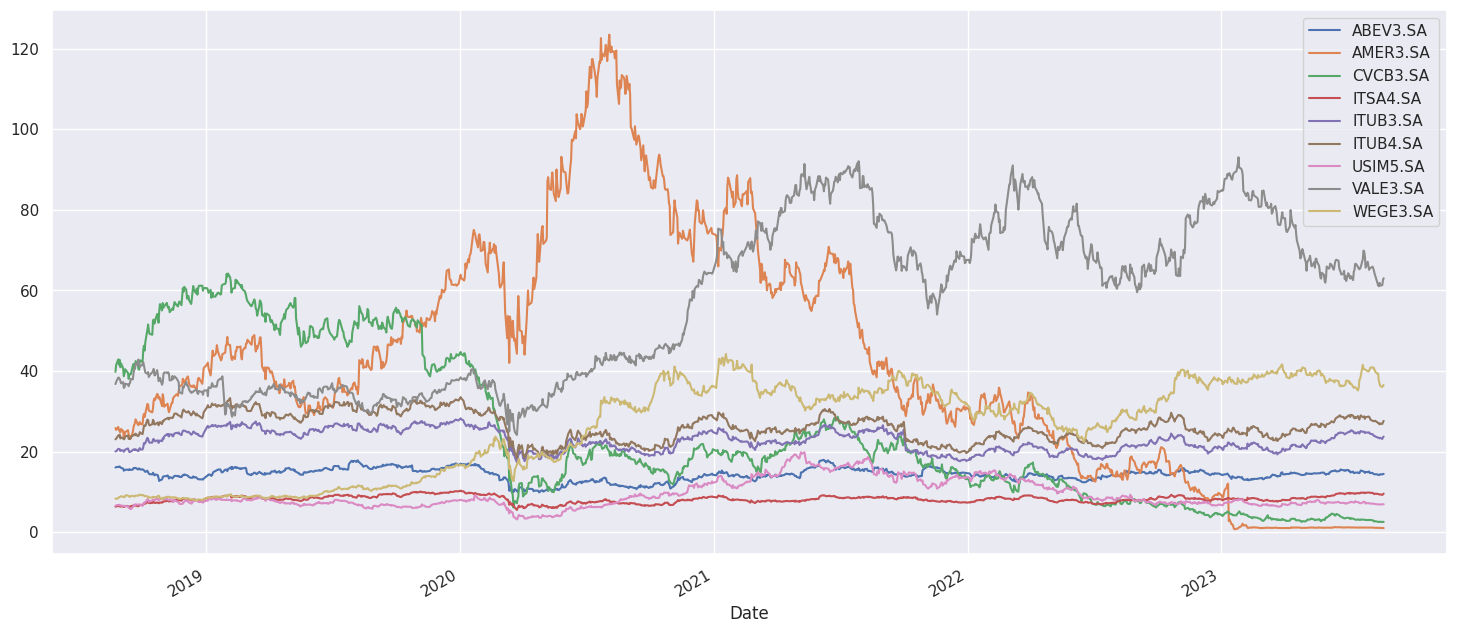

In [ ]:
sns.set()
carteira.plot(figsize=(18,8));


In [ ]:
import pandas as pd

# Supondo que "carteira" é o DataFrame com os dados financeiros

# Definir o período da pandemia
inicio_pandemia = pd.Timestamp('2020-03-01')
fim_pandemia = pd.Timestamp('2021-06-30')

# Filtrar os dados para remover o período da pandemia
carteira_sem_pandemia = carteira[(carteira.index < inicio_pandemia) | (carteira.index > fim_pandemia)]

# Agora você pode usar o DataFrame "carteira_sem_pandemia" para suas análises

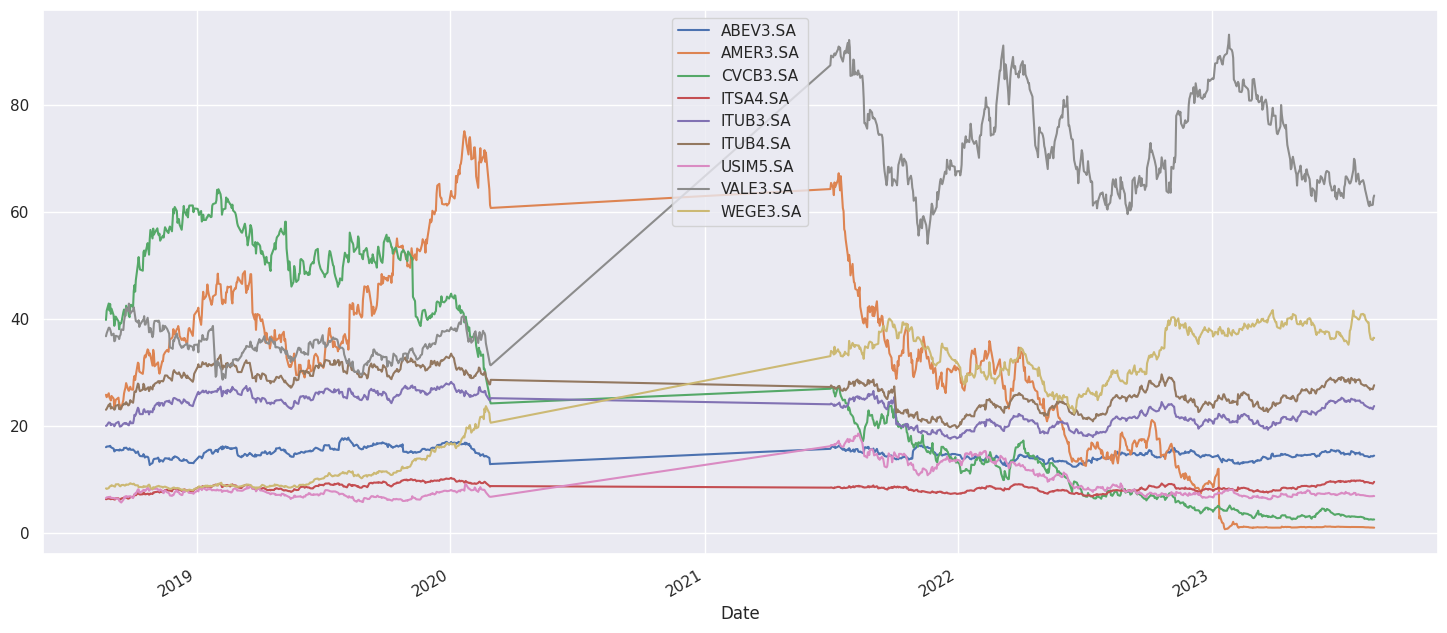

In [ ]:
sns.set()
carteira_sem_pandemia.plot(figsize=(18,8));


https://github.com/codigoquant/python_para_investimentos/blob/master/04_Simulando_CARTEIRA_DE_A%C3%87%C3%95ES_e_comparando_com_o_IBOVESPA_Python_para_Investimentos_com_Google_Colab.ipynb

In [ ]:
carteira_normalizada = (carteira / carteira.iloc[0])*10000
carteira_normalizada.dropna(inplace=True)

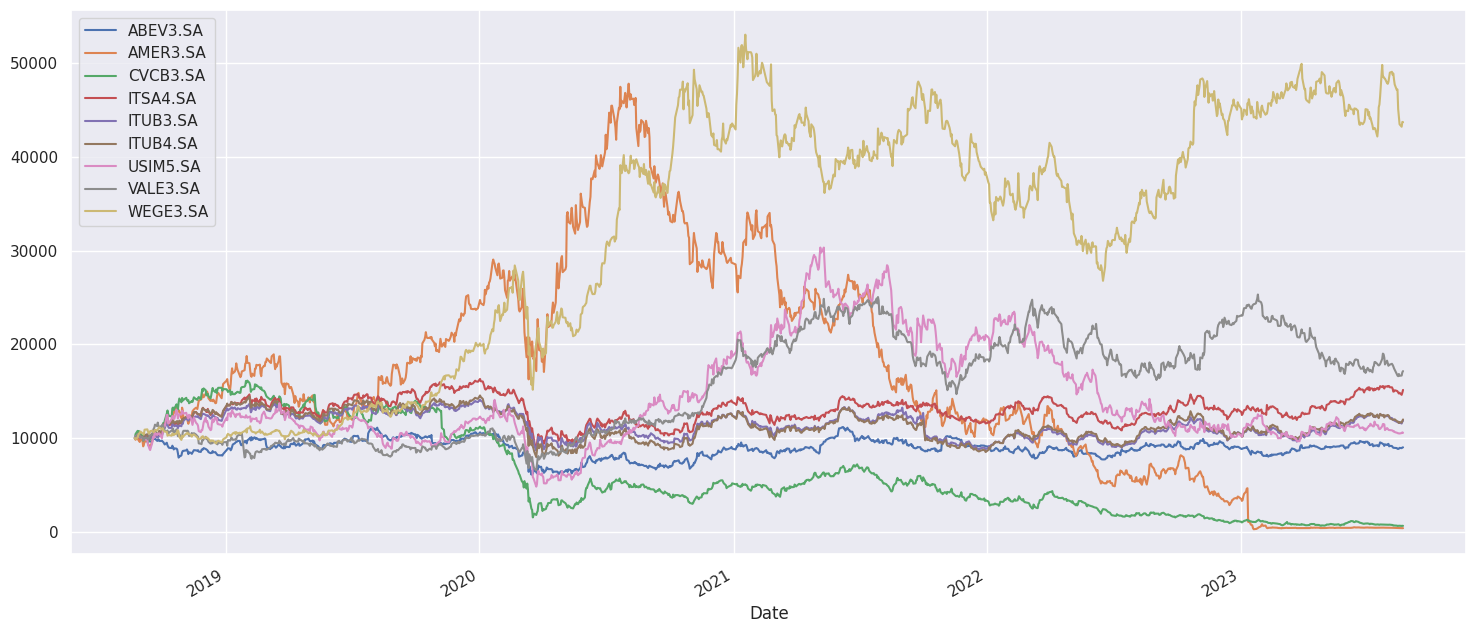

In [ ]:

carteira_normalizada.plot(figsize=(18,8));

In [ ]:
carteira_sem_pandemia = (carteira_sem_pandemia / carteira_sem_pandemia.iloc[0])*10000
carteira_sem_pandemia.dropna(inplace=True)

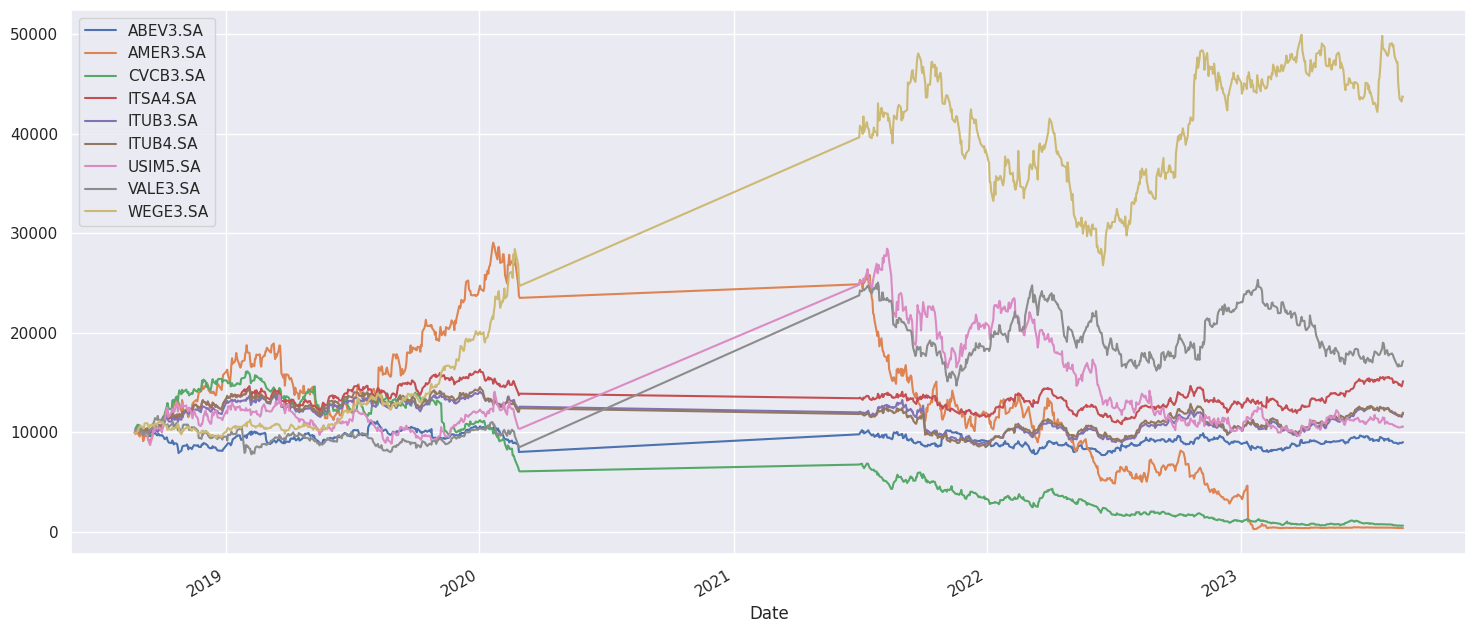

In [ ]:
carteira_sem_pandemia.plot(figsize=(18,8));

In [ ]:
tickers = "ABEV3.SA ITSA4.SA WEGE3.SA USIM5.SA VALE3.SA ^BVSP"
dados_yahoo = yf.download(tickers=tickers, period="5y")['Adj Close']

[*********************100%%**********************]  6 of 6 completed


In [ ]:
#
tickers = "itub4.sa ^BVSP"
dados_yahoo = yf.download(tickers=tickers, period="5y")['Adj Close']

[*********************100%%**********************]  2 of 2 completed


In [ ]:
#
dados_yahoo

ITUB4.SA         ^BVSP
Date                               
2018-08-23  23.026026   75634.00000
2018-08-24  23.198822   76262.00000
2018-08-27  23.968035   77930.00000
2018-08-28  23.800802   77473.00000
2018-08-29  24.196562   78389.00000
...               ...           ...
2023-08-17  26.750000  114982.00000
2023-08-18  26.959999  115409.00000
2023-08-21  26.850000  114429.00000
2023-08-22  27.270000  116156.00000
2023-08-23  27.610001  118134.59375

[1240 rows x 2 columns]

In [ ]:
retorno = dados_yahoo.pct_change()
retorno

ITUB4.SA     ^BVSP
Date                          
2018-08-23       NaN       NaN
2018-08-24  0.007504  0.008303
2018-08-27  0.033157  0.021872
2018-08-28 -0.006977 -0.005864
2018-08-29  0.016628  0.011823
...              ...       ...
2023-08-17 -0.011821 -0.005277
2023-08-18  0.007850  0.003714
2023-08-21 -0.004080 -0.008492
2023-08-22  0.015642  0.015092
2023-08-23  0.012468  0.017034

[1240 rows x 2 columns]

In [ ]:

retorno = dados_yahoo.pct_change()
retorno

ABEV3.SA  ITSA4.SA  USIM5.SA  VALE3.SA  WEGE3.SA     ^BVSP
Date                                                                  
2018-08-23       NaN       NaN       NaN       NaN       NaN       NaN
2018-08-24  0.006864  0.004233  0.017456  0.014996 -0.011186  0.008303
2018-08-27  0.003146  0.028451  0.013480  0.028070  0.018100  0.021872
2018-08-28 -0.001568 -0.016393 -0.009674 -0.000359  0.027222 -0.005864
2018-08-29  0.007853  0.028125  0.017094 -0.007727  0.014061  0.011823
...              ...       ...       ...       ...       ...       ...
2023-08-17  0.002821 -0.008457  0.000000  0.014087 -0.018612 -0.005277
2023-08-18  0.009845  0.005692 -0.001458 -0.011145 -0.017610  0.003714
2023-08-21 -0.003482 -0.014941  0.004380  0.001307 -0.006067 -0.008492
2023-08-22  0.007687  0.016251  0.007267  0.020881  0.011931  0.015092
2023-08-23  0.002080  0.019190 -0.004329  0.007351 -0.000548  0.017034

[1240 rows x 6 columns]

In [ ]:
#
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

ITUB4.SA     ^BVSP
Date                          
2018-08-23  1.000000  1.000000
2018-08-24  1.007504  1.008303
2018-08-27  1.040911  1.030357
2018-08-28  1.033648  1.024314
2018-08-29  1.050835  1.036425
...              ...       ...
2023-08-17  1.161729  1.520242
2023-08-18  1.170849  1.525888
2023-08-21  1.166072  1.512931
2023-08-22  1.184312  1.535764
2023-08-23  1.199078  1.561924

[1240 rows x 2 columns]

In [ ]:

retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado



ABEV3.SA  ITSA4.SA  USIM5.SA  VALE3.SA  WEGE3.SA     ^BVSP
Date                                                                  
2018-08-23  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
2018-08-24  1.006864  1.004233  1.017456  1.014996  0.988814  1.008303
2018-08-27  1.010032  1.032804  1.031172  1.043486  1.006712  1.030357
2018-08-28  1.008448  1.015873  1.021197  1.043112  1.034117  1.024314
2018-08-29  1.016368  1.044444  1.038653  1.035052  1.048658  1.036425
...              ...       ...       ...       ...       ...       ...
2023-08-17  0.887045  1.475990  1.050714  1.684490  4.428267  1.520242
2023-08-18  0.895778  1.484392  1.049182  1.665716  4.350283  1.525888
2023-08-21  0.892659  1.462213  1.053777  1.667893  4.323889  1.512931
2023-08-22  0.899521  1.485976  1.061436  1.702720  4.375478  1.535764
2023-08-23  0.901392  1.514491  1.056841  1.715236  4.373078  1.561924

[1240 rows x 6 columns]

In [ ]:
#
carteira = 10000 * retorno_acumulado.iloc[:, :5]
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change()
carteira

ITUB4.SA         ^BVSP         saldo   retorno
Date                                                          
2018-08-23  10000.000000  10000.000000  20000.000000       NaN
2018-08-24  10075.043888  10083.031441  20158.075329  0.007904
2018-08-27  10409.106192  10303.567179  20712.673371  0.027512
2018-08-28  10336.478586  10243.144618  20579.623203 -0.006424
2018-08-29  10508.353484  10364.254171  20872.607655  0.014237
...                  ...           ...           ...       ...
2023-08-17  11617.289177  15202.422191  26819.711368 -0.008122
2023-08-18  11708.489928  15258.878282  26967.368211  0.005506
2023-08-21  11660.718461  15129.306925  26790.025387 -0.006576
2023-08-22  11843.120792  15357.643388  27200.764180  0.015332
2023-08-23  11990.779861  15619.244487  27610.024347  0.015046

[1240 rows x 4 columns]

In [ ]:

carteira = 10000 * retorno_acumulado.iloc[:, :5]
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change()
carteira


ABEV3.SA      ITSA4.SA      USIM5.SA      VALE3.SA  \
Date                                                                 
2018-08-23  10000.000000  10000.000000  10000.000000  10000.000000   
2018-08-24  10068.638706  10042.328281  10174.562203  10149.955883   
2018-08-27  10100.317286  10328.039264  10311.718846  10434.864379   
2018-08-28  10084.477401  10158.731430  10211.967033  10431.116417   
2018-08-29  10163.675634  10444.441658  10386.531427  10350.516012   
...                  ...           ...           ...           ...   
2023-08-17   8870.448948  14759.898770  10507.140550  16844.903357   
2023-08-18   8957.780693  14843.916260  10491.823669  16657.163731   
2023-08-21   8926.591124  14622.128277  10537.773583  16678.930148   
2023-08-22   8995.209009  14859.758582  10614.355801  17027.202157   
2023-08-23   9013.922869  15144.914344  10568.406616  17152.361907   

                WEGE3.SA         saldo   retorno  
Date                                              
2018-08-23  10000.000000  50000.000000       NaN  
2018-08-24   9888.144989  50323.630062  0.006473  
2018-08-27  10067.120329  51242.060104  0.018250  
2018-08-28  10341.168024  51227.460304 -0.000285  
2018-08-29  10486.575763  51831.740493  0.011796  
...                  ...           ...       ...  
2023-08-17  44282.666712  95265.058338 -0.007364  
2023-08-18  43502.829242  94453.513594 -0.008519  
2023-08-21  43238.887983  94004.311116 -0.004756  
2023-08-22  43754.779619  95251.305167  0.013265  
2023-08-23  43730.784127  95610.389864  0.003770  

[1240 rows x 7 columns]

In [ ]:


!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
#import pandas_datareader.data as web
#yf.pdr_override()

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para corrgir o bug: AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'
!pip install git+https://github.com/quantopian/pyfolio

import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')


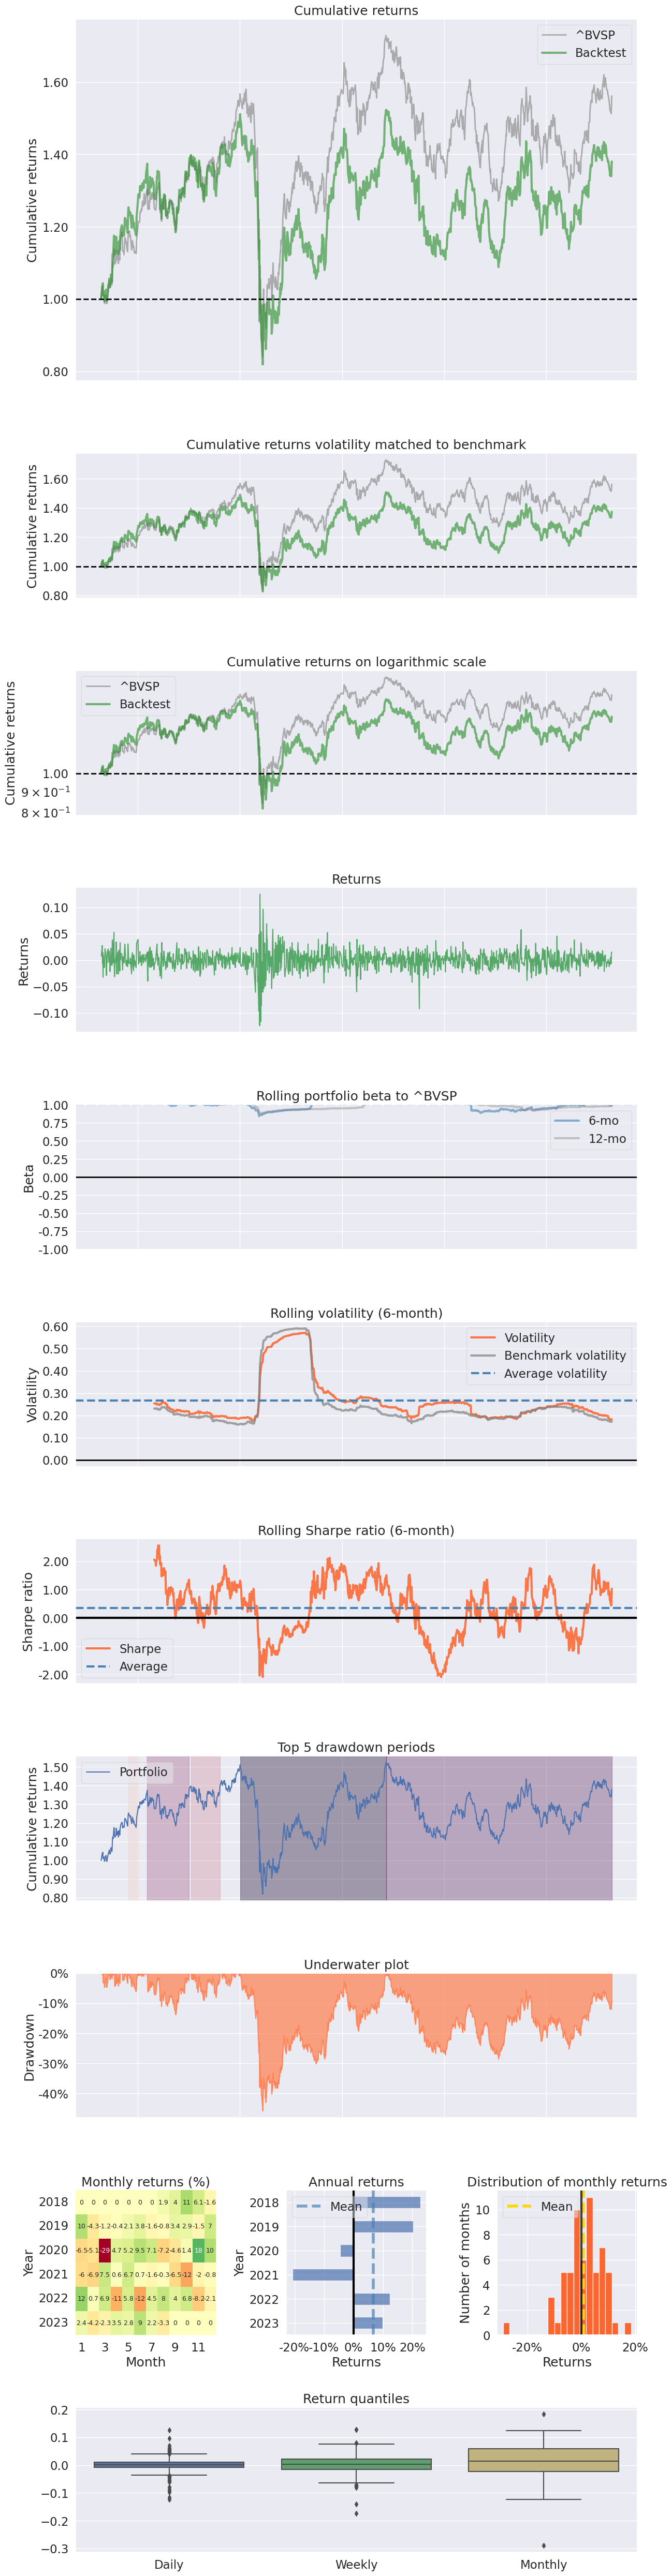

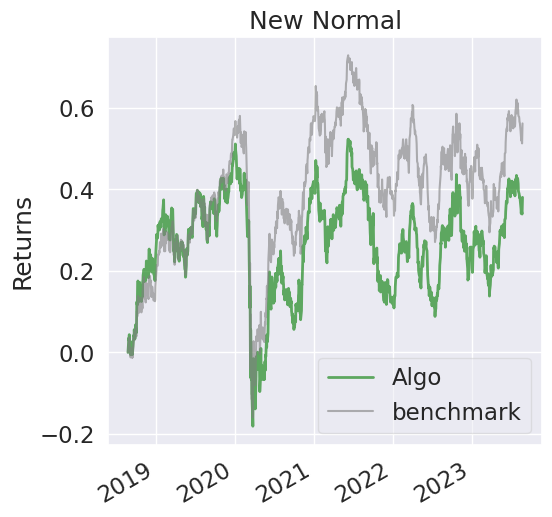

In [ ]:
#
pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["^BVSP"])

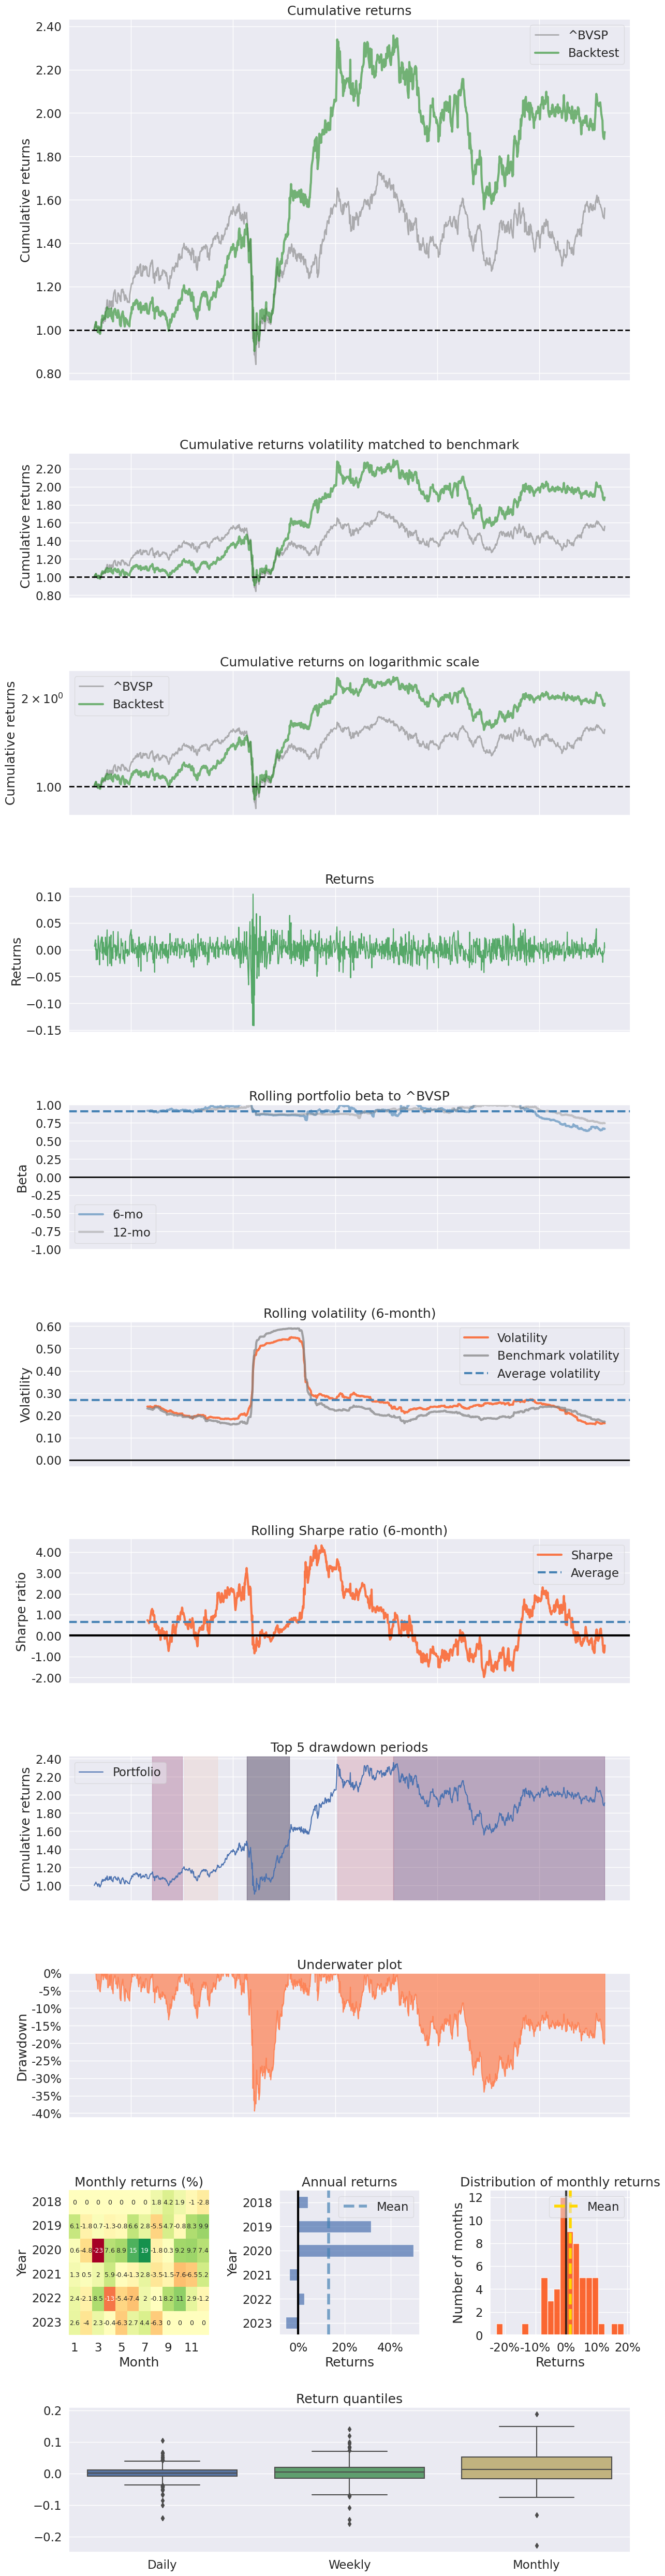

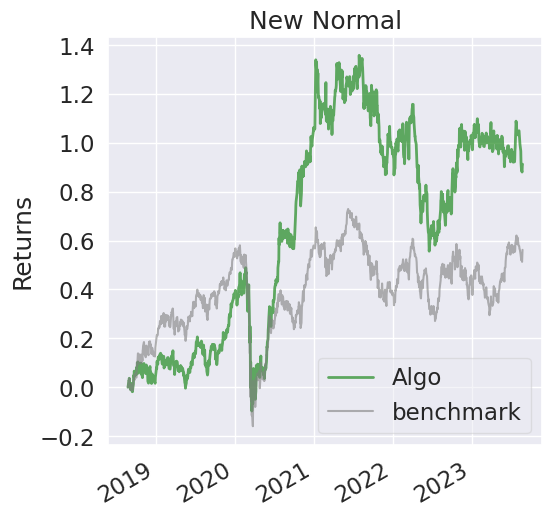

In [ ]:

pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["^BVSP"])

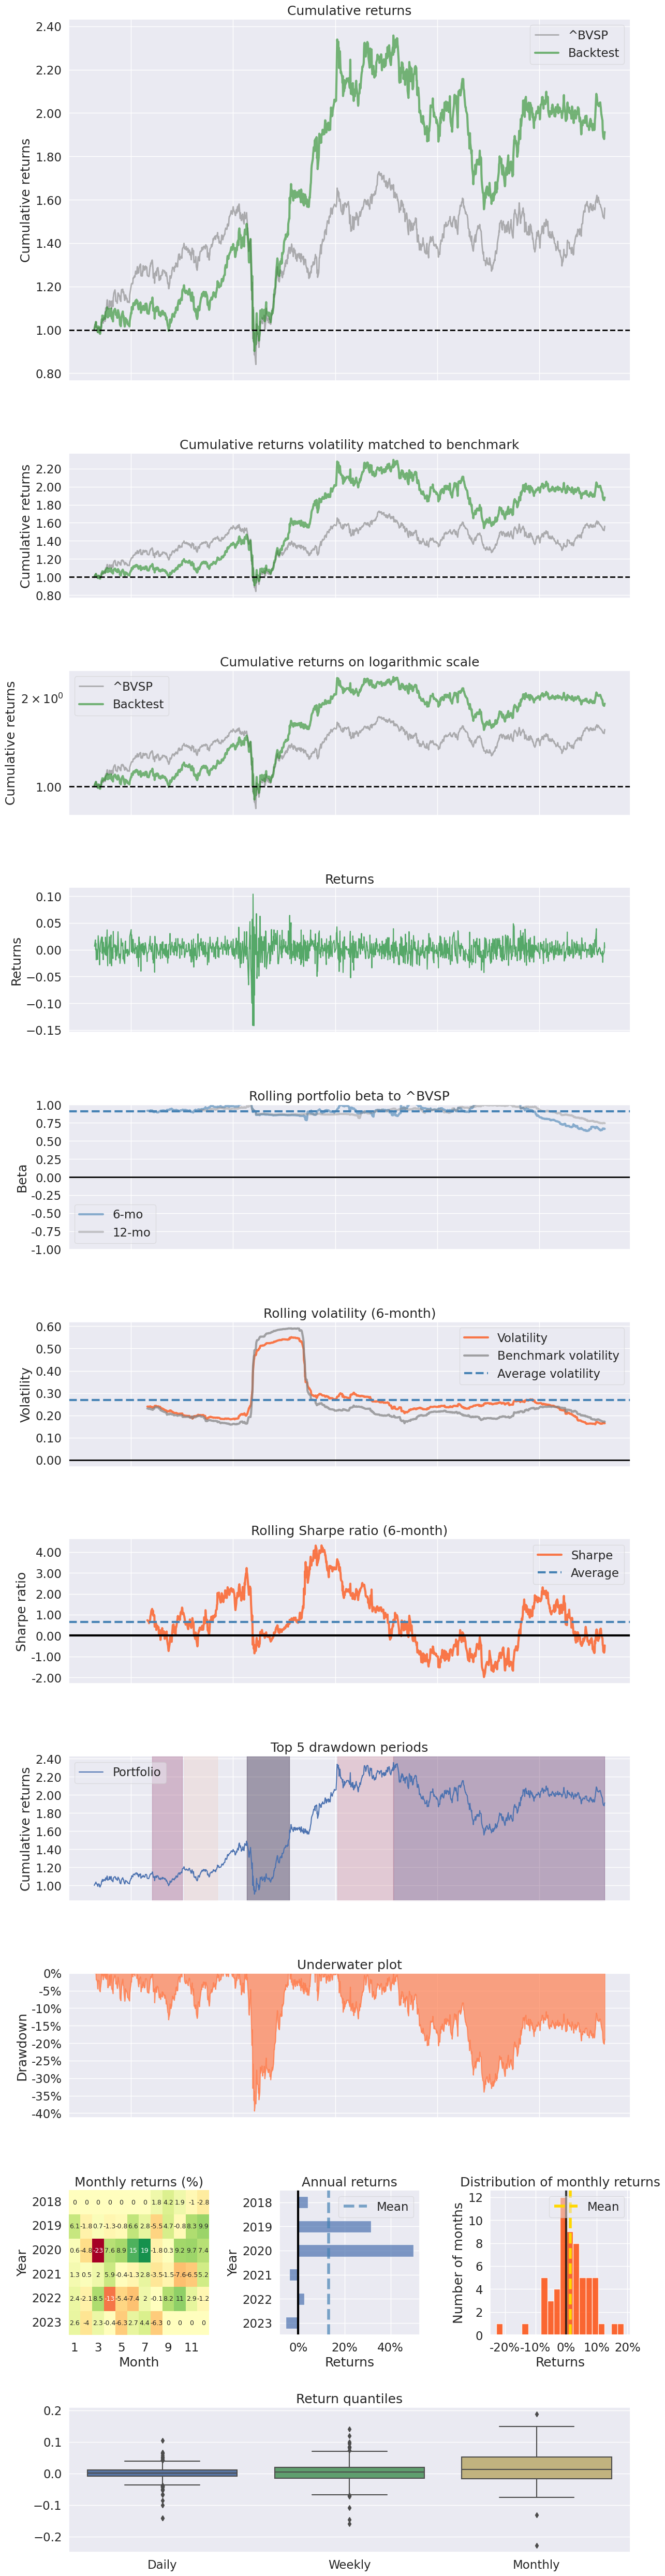

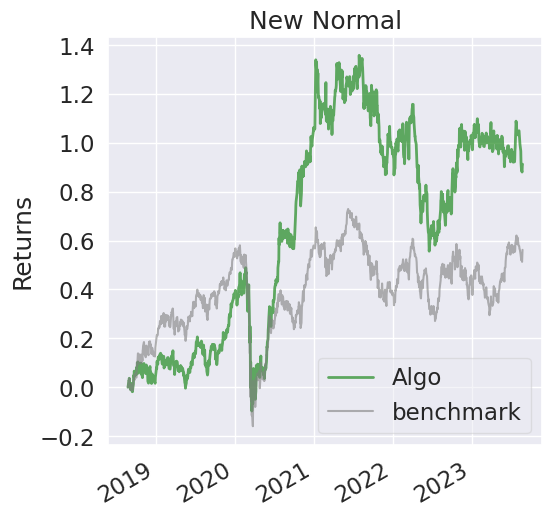

In [ ]:
pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["^BVSP"])

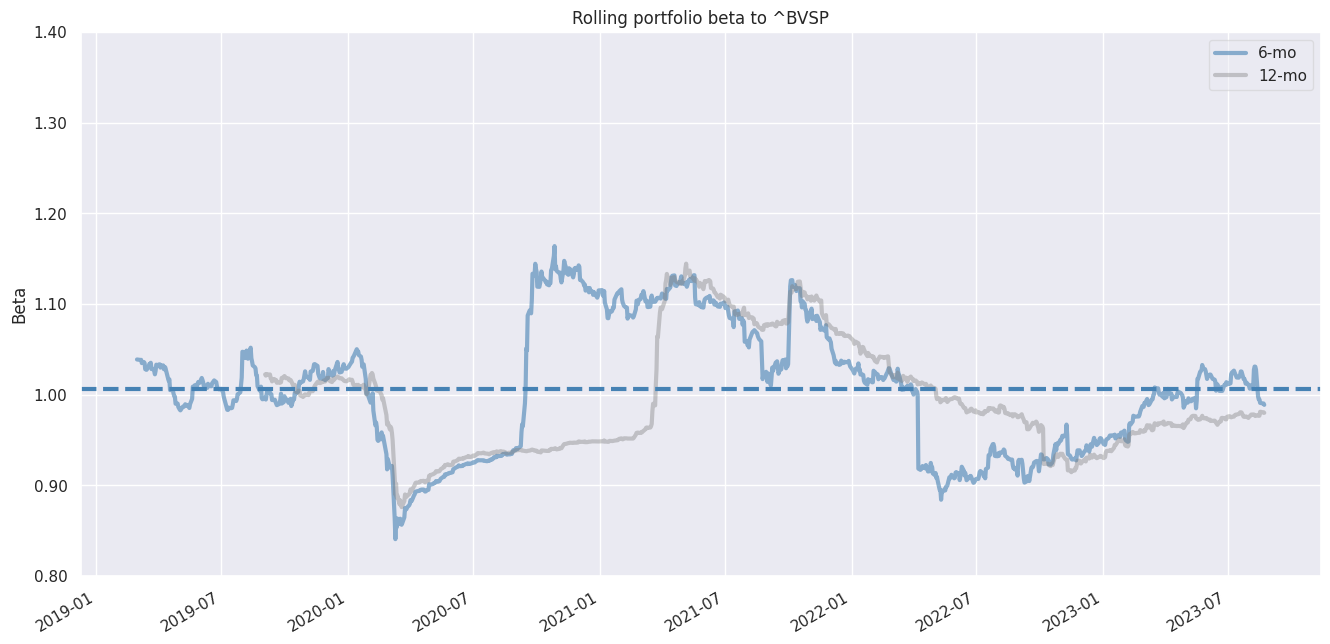

In [ ]:
#
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(carteira["retorno"], factor_returns=retorno["^BVSP"], ax=ax1)
plt.ylim((0.8, 1.4));

In [ ]:
# Ricos pelo Acaso

import plotly.graph_objects as go

In [ ]:
# https://www.investing.com/

!pip install investpy
import investpy as inv

In [ ]:
# comparando com inest x yahoo

inv.get_stocks('brazil')
#inv.get_stock_company_profile('bbdc4', country='brazil')
inv.get_stock_company_profile('ITUB4', country='brazil')

{'url': 'https://www.investing.com/equities/itauunibanco-pn-edj-n1-company-profile',
 'desc': 'Itaú Unibanco Holding S.A. offers a range of financial products and services to individuals and corporate customers in Brazil and internationally. The company operates through three segments: Retail Banking, Wholesale Banking, and Activities with the Market + Corporation. It offers current account; loans; credit and debit cards; investment and commercial banking services; real estate lending services; financing and investment services; economic, financial and brokerage advisory; and leasing and foreign exchange services. The company also provides property and casualty insurance products covering loss, damage, or liabilities for assets or persons, as well as life insurance products covering death and personal accident. It serves retail customers, account and non-account holders, individuals and legal entities, high income clients, microenterprises, and small companies, as well as middle-market

In [ ]:
# Baixando as cotações do Yahoo Finance para o Índice
documentação https://investpy.readthedocs.io/_api/stocks.html

inv.get_stock_information('ITUB4', country='brazil')

RuntimeError: ignored

In [ ]:

inv.technical_indicators('bbdc4', country='brazil', product_type='stock')

ConnectionError: ignored

In [ ]:

inv.moving_averages('bbdc4', country='brazil', product_type='stock')

In [ ]:

inv.moving_averages('bbdc4', country='brazil', product_type='stock')

In [ ]:
# Curva de Juros
bondsBR = inv.get_bonds_list('brazil')

In [ ]:
bondsBR

In [ ]:
bonds_overview  = inv.get_bonds_overview('brazil')

In [ ]:
bonds_overview

In [ ]:
plt.plot(bondsBR, bonds_overview['last_close']);

In [ ]:
# Baixando as cotações do Yahoo Finance para o Índice Bovespa
ibov = web.get_data_yahoo('AMER3.SA', start='2019-07-01', end='2023-07-01')

[*********************100%%**********************]  1 of 1 completed


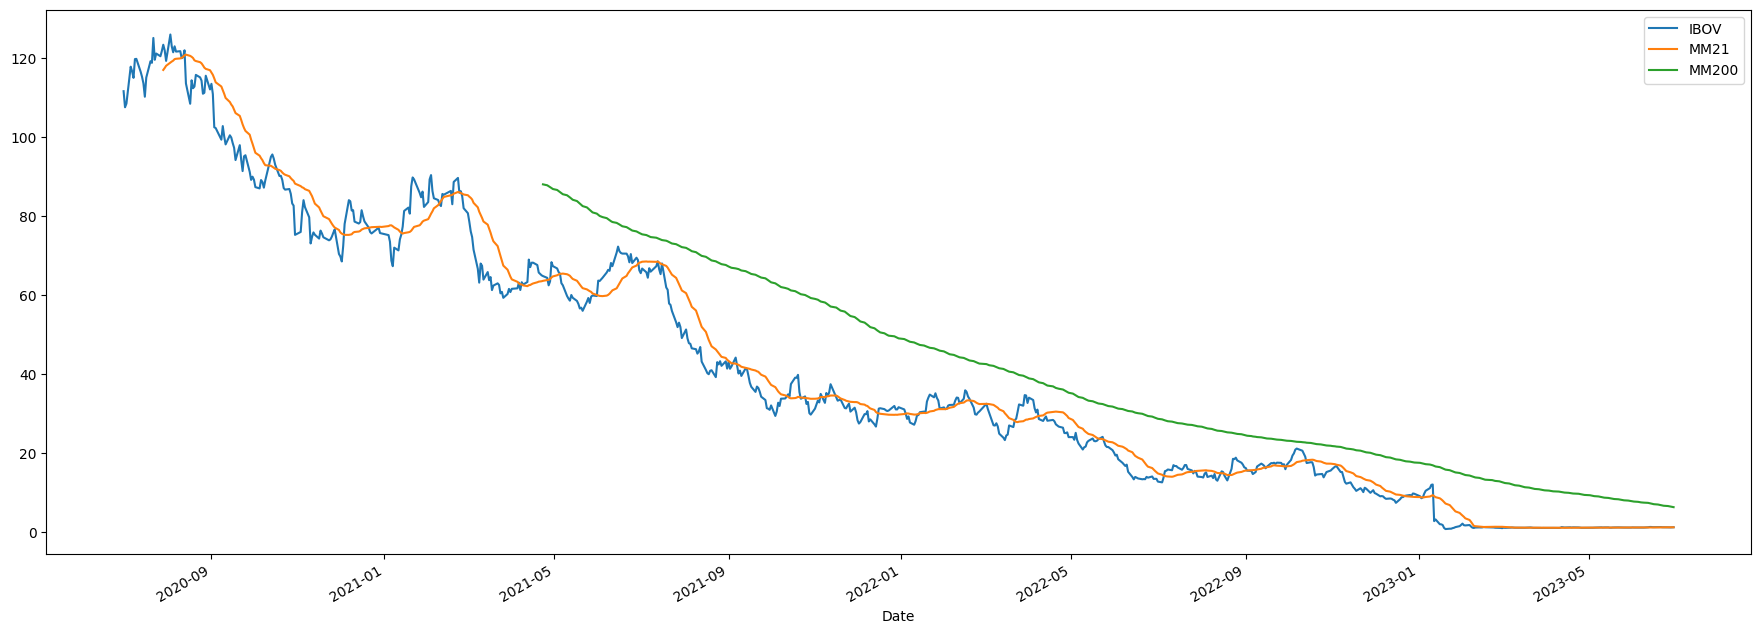

In [ ]:
ibov["Close"].plot(figsize=(22,8), label="IBOV")
#  aplica uma função de janela deslizante. calculada uma média móvel 21 dias. Isso significa que para cada ponto no conjunto de dados, é considerada uma janela de 21 dias (incluindo o ponto atual e os 20 dias anteriores)
ibov["Close"].rolling(21).mean().plot(label="MM21")
ibov["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()